<h2 style="color:red">Logistic Regression from scratch using python</h2>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

<h2>Explanation of Logistic Regression</h2>


<center><h3 style="color:blue"><b>Sigmoid Function</b></h3><img src="logistic regression.jpg" height = "450" width = "700" ></center>



<center><h3><b>Binary Cross Entropy</b></h3>
<img src="binary cross entropy.jpg" height = "400" width = "700"></center>

In [40]:
class LogisticRegression:
    '''
    Implementation of Logistic Regression from scratch using Python.
    Attributes:
    learning_rate : This attribute is used for gradient descent as learning rate to train the model.
    iterations : Used for training the models, it's also known as epochs.
    formula : Sigmoid function and binary cross-entropy loss.
    X : This variable consists of independent variables data from the dataset.
    y : This consists of dependent variable data.
    rows : Number of rows in the dataset.
    cols : Number of columns in the dataset.
    weights : Coefficients for the independent variables.
    bias : Intercept term.
    losses : List to store the loss values for each iteration.
    '''
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.losses = []

    # Passing dataset to model
    def fit(self, X, y):
        # Number of rows and columns in the dataset.
        rows, cols = X.shape
        # Initializing weights to zero to train model from origin
        self.weights = np.zeros(cols)
        # Initializing bias
        self.bias = 0

        # Implementing gradient descent
        for i in range(self.iterations):
            value = self.update(X)
            self.losses.append(self.binary_cross_entropy(y, value))
            derivative_z = value - y
            derivative_weight = (1 / rows) * np.dot(X.T, derivative_z)
            derivative_bias = (1 / rows) * np.sum(derivative_z)
            # Updating weights
            self.weights -= self.learning_rate * derivative_weight
            self.bias -= self.learning_rate * derivative_bias
            if i % 100 == 0:  
                print(f"Iteration {i}: Weights: {self.weights}, Bias: {self.bias}")

    # Sigmoid function
    # Formula: sigmoid(x) = 1 / (1 + exp(-x))
    # The sigmoid function maps any real-valued number into the range (0, 1),
    # which is useful for binary classification as it can be interpreted as a probability.
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Implementing Binary Cross Entropy
    # Formula: BCE = -1/N * Σ [y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)]
    # where N is the number of samples, y_true is the true label, and y_pred is the predicted probability.
    # This loss function measures the performance of a classification model whose output is a probability value between 0 and 1.
    def binary_cross_entropy(self, y_true, y_pred):
        epsilon = 1e-9  # Adding a small constant to avoid log(0)
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    # Updating weights
    def update(self, X):
        z = np.dot(X, self.weights) + self.bias
        value = self.sigmoid(z)
        return value

    # Predict function
    # It returns the predicted class (0 or 1) based on the threshold of 0.5.
    def predict(self, X):
        threshold = 0.5
        y_prediction = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(y_prediction)
        predicted_class = [1 if i > threshold else 0 for i in y_predicted]
        return np.array(predicted_class)


<h2 style="color:blue">Using Breast Cancer Dataset for testing</h2>

In [41]:
dataset = load_breast_cancer()
df = pd.DataFrame(data= dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
df.shape

(569, 31)

In [43]:
X = dataset.data
y = dataset.target

In [44]:
# class names
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

In [47]:
model = LogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

Iteration 0: Weights: [ 7.08776923e-03  1.81342857e-02  4.01314286e-02 -3.05095604e-01
  1.08538791e-04 -6.54032967e-06 -1.38012047e-04 -7.69120659e-05
  2.05003297e-04  8.69100000e-05 -2.15672527e-04  1.70781209e-03
 -1.51334835e-03 -6.74083956e-02  1.08738901e-05  1.12844286e-05
  1.28533802e-05  5.17473626e-06  2.87610989e-05  4.32259670e-06
  4.24180220e-03  2.18365934e-02  2.08293407e-02 -8.28997802e-01
  1.36267802e-04 -9.41775824e-05 -2.61320912e-04 -9.16875714e-05
  2.72590110e-04  8.75195604e-05], Bias: 0.0013736263736263737
Iteration 100: Weights: [ 1.43106667e+00  2.68547176e+00  8.76860027e+00  1.09218228e+01
  1.50646398e-02  4.98170448e-03 -7.79796952e-03 -4.25522502e-03
  2.82399412e-02  1.12632054e-02  7.01833784e-03  2.17061029e-01
  4.55074735e-02 -3.00947061e+00  1.35012560e-03  2.28271184e-03
  2.71066712e-03  1.07083527e-03  3.62834373e-03  5.84809268e-04
  1.35323886e+00  3.38683548e+00  8.25956594e+00 -1.37785009e+01
  1.96371453e-02  5.32117595e-03 -9.20199146e-

C:\Users\Admin\AppData\Local\Temp\ipykernel_9916\2278385613.py:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration 500: Weights: [ 2.07593907e+00  3.41372003e+00  1.23442897e+01  7.93636545e+00
  2.03279691e-02 -1.93171405e-03 -2.62798967e-02 -1.19293675e-02
  3.83518569e-02  1.57643612e-02  2.96594216e-03  2.34987818e-01
 -4.91046133e-02 -6.11003027e+00  1.53192510e-03 -3.78671777e-04
 -1.05967260e-03  3.99705278e-04  3.84953251e-03  4.54842623e-04
  2.16157312e+00  4.34214795e+00  1.25345999e+01 -9.58904471e+00
  2.66349111e-02 -1.64821694e-02 -4.85031913e-02 -1.04816137e-02
  5.54194740e-02  1.62279630e-02], Bias: 0.2687086659166396
Iteration 600: Weights: [ 2.31427754e+00  3.72910205e+00  1.37074343e+01  7.86796644e+00
  2.24662248e-02 -3.65075106e-03 -3.14583690e-02 -1.41897228e-02
  4.22570006e-02  1.75152992e-02  2.92759271e-03  2.56933927e-01
 -6.36008422e-02 -6.82068208e+00  1.68040468e-03 -8.35524041e-04
 -1.67544917e-03  3.27807824e-04  4.19315941e-03  4.77542281e-04
  2.40401202e+00  4.70678330e+00  1.38287414e+01 -1.23870137e+01
  2.91559627e-02 -2.37995413e-02 -6.06970891e-0

In [48]:
y_preds = model.predict(X_test)
mapping = {0 : "malignant", 1 : "benign"}
predictions = [mapping[pred] for pred in y_preds]
predictions

C:\Users\Admin\AppData\Local\Temp\ipykernel_9916\2278385613.py:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


['malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_preds, y_test)
print("Confusion Matrix : \n", confusion_matrix(y_preds, y_test))

Confusion Matrix : 
 [[42  2]
 [ 5 65]]


In [50]:
print("Accuracy of our model : ",accuracy_score(y_preds, y_test))

Accuracy of our model :  0.9385964912280702


## Checking the accurary from inbuilt algorithm.

In [51]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(dataset.data ,dataset.target,train_size=0.8, random_state=0)

lmodel = LogisticRegression().fit(X_train, y_train)

y_predtions = lmodel.predict(X_test)
predictions = [mapping[pred] for pred in y_preds]

print("Predictions from in-built model : \n",predictions)

print("\n\nConfusion Matrix : \n",confusion_matrix(y_predtions, y_test))

print("\n\nAccuracy : ",accuracy_score(y_predtions, y_test))


Predictions from in-built model : 
 ['malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'benign'

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
cols = list(dataset.feature_names)

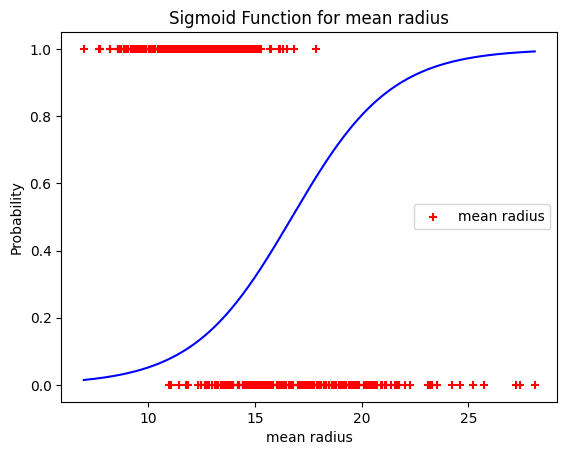

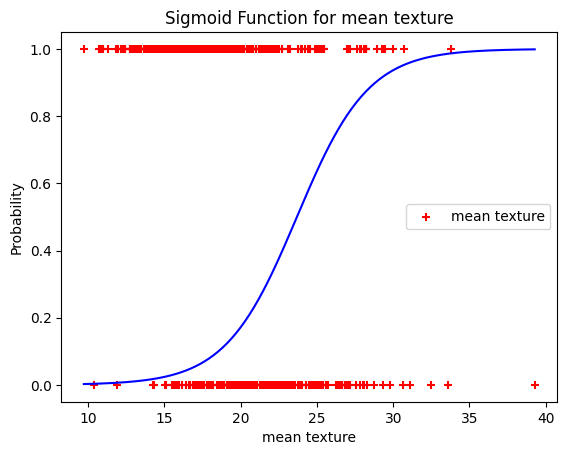

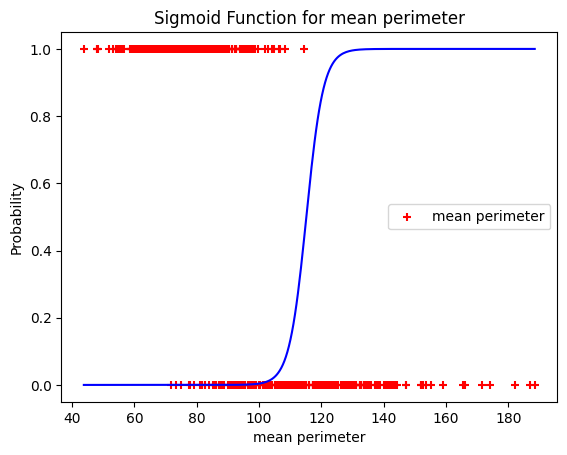

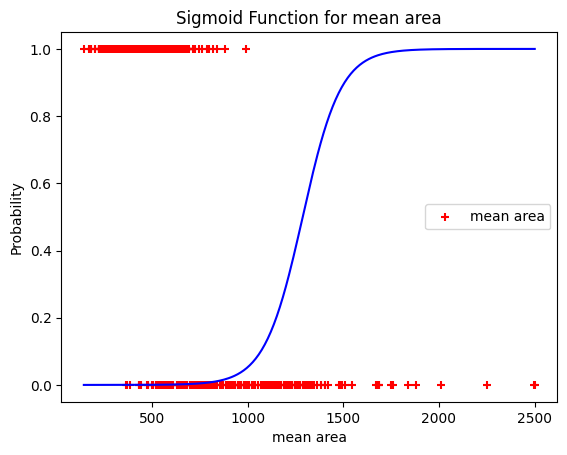

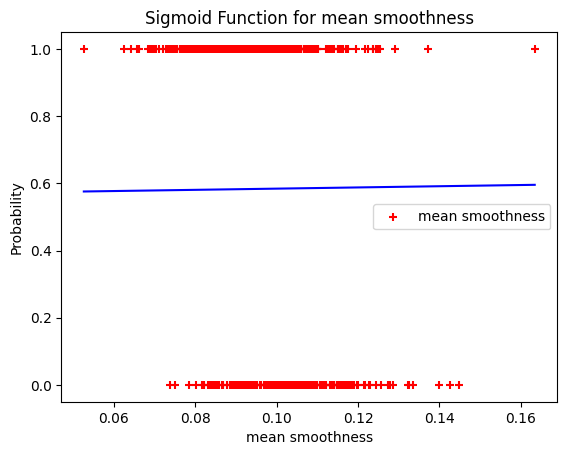

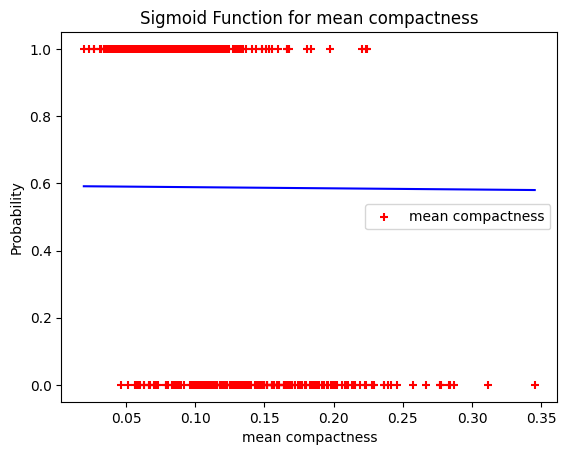

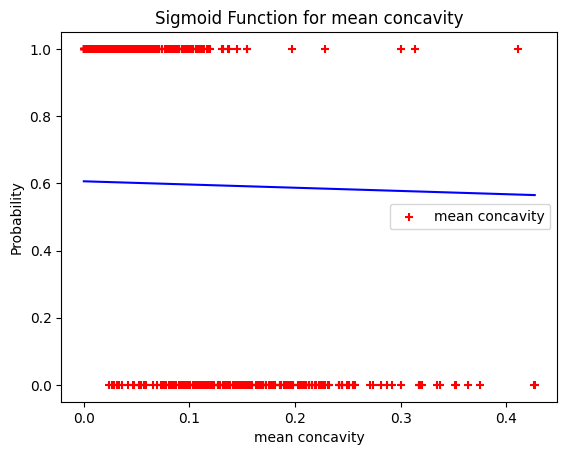

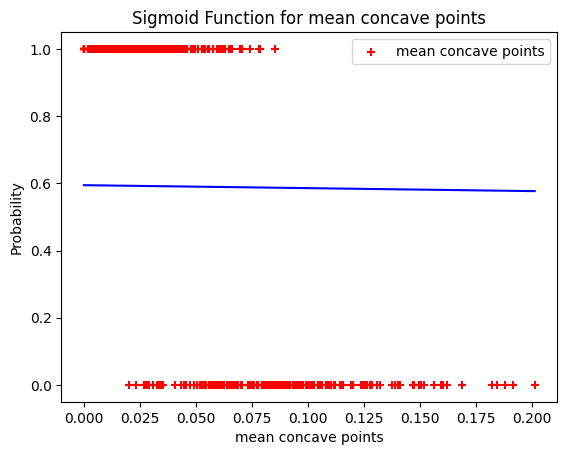

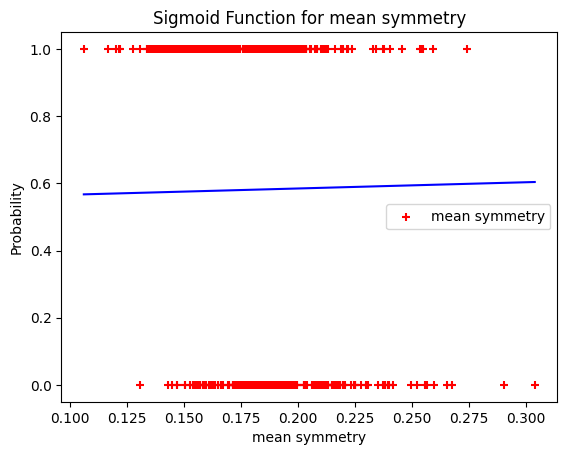

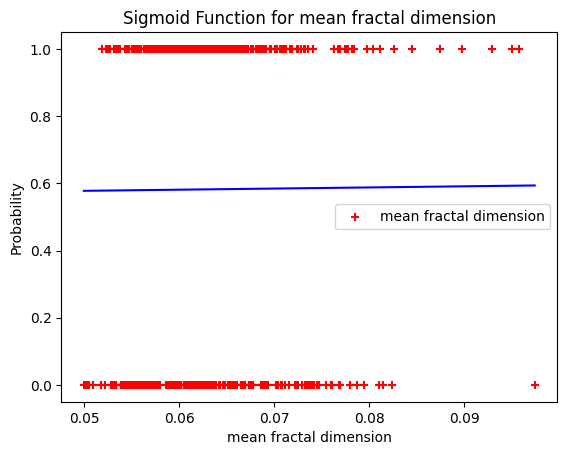

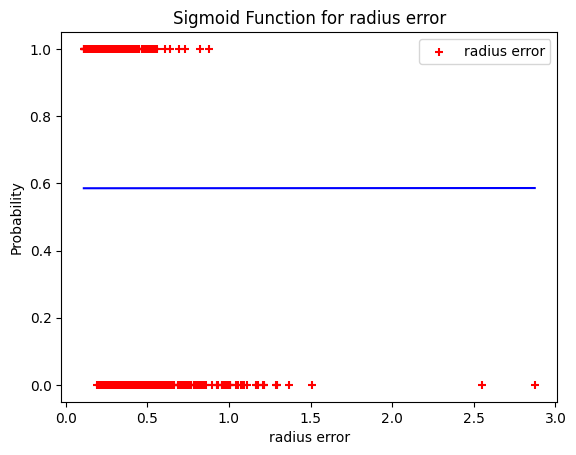

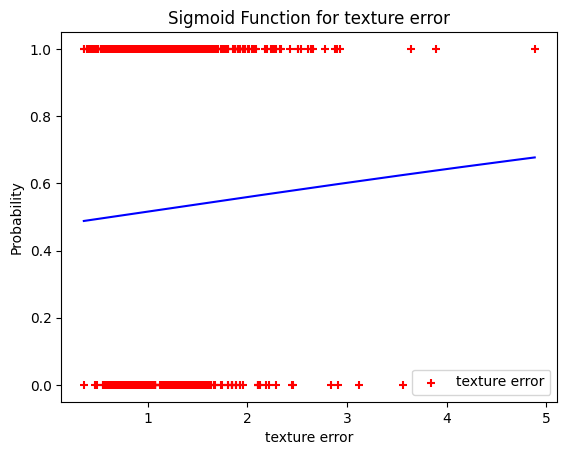

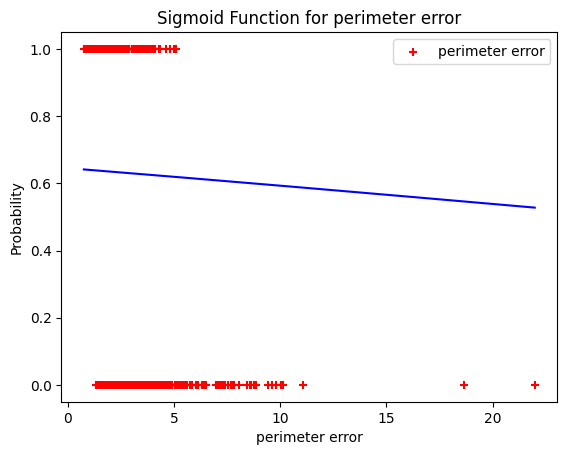

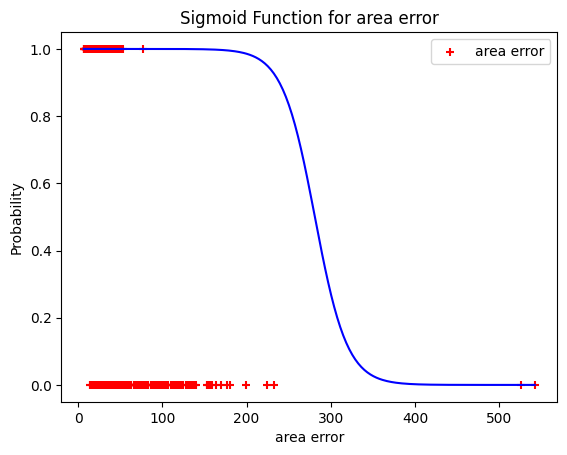

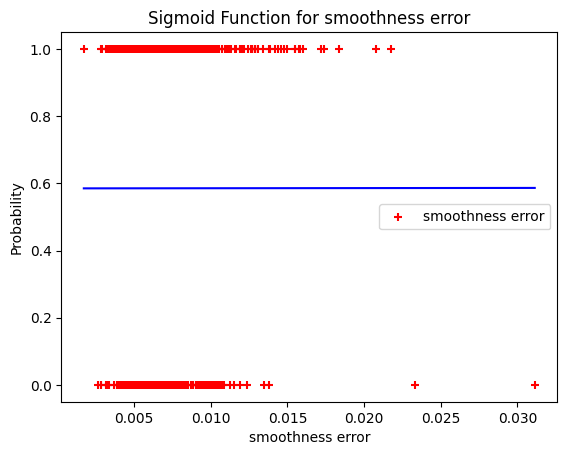

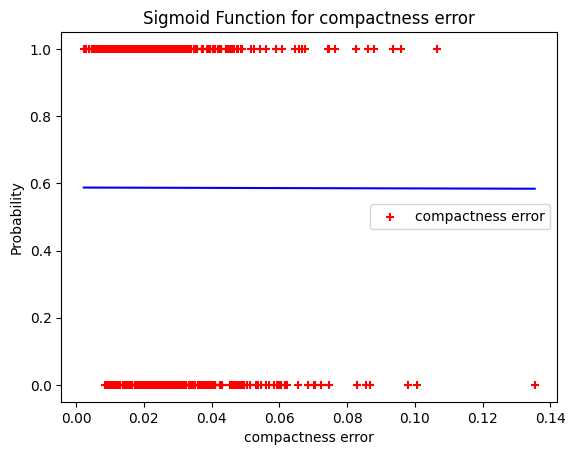

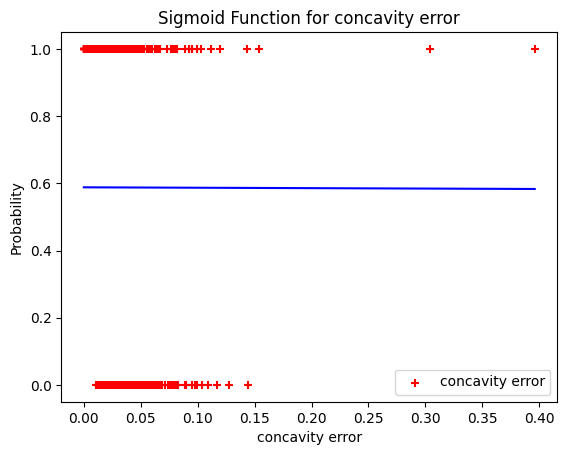

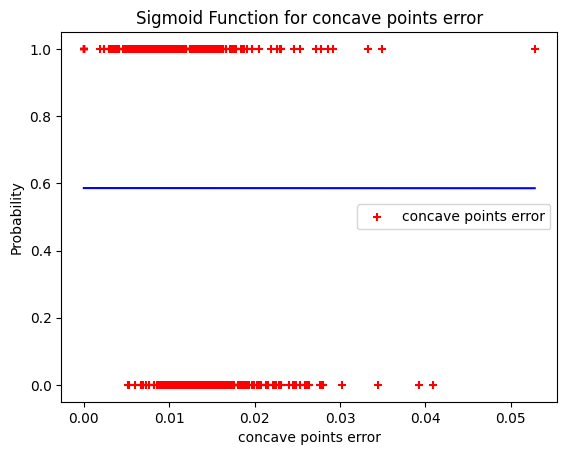

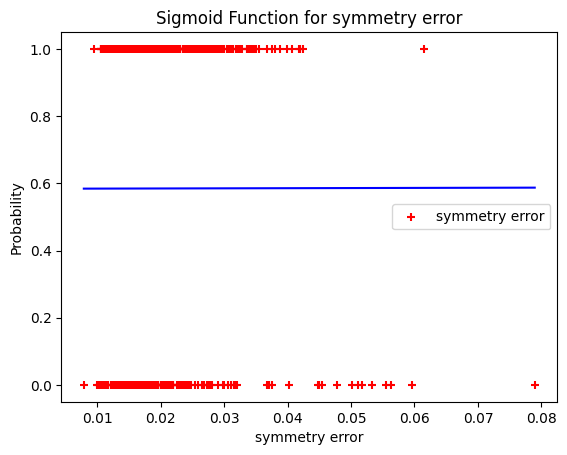

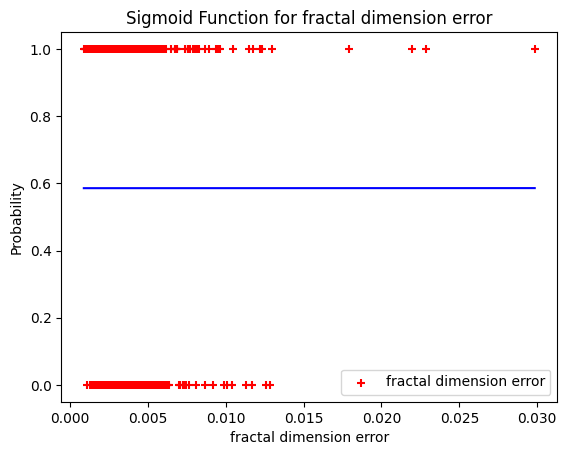

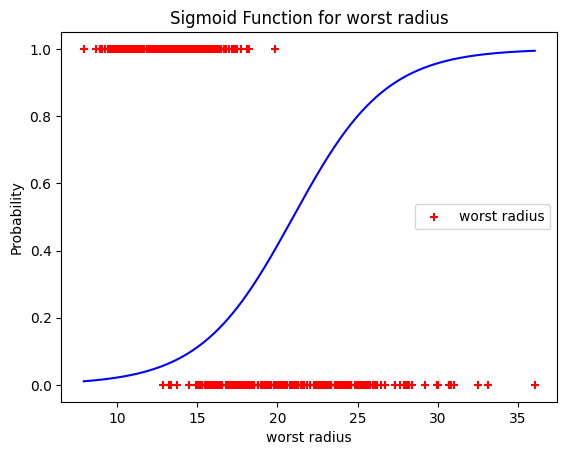

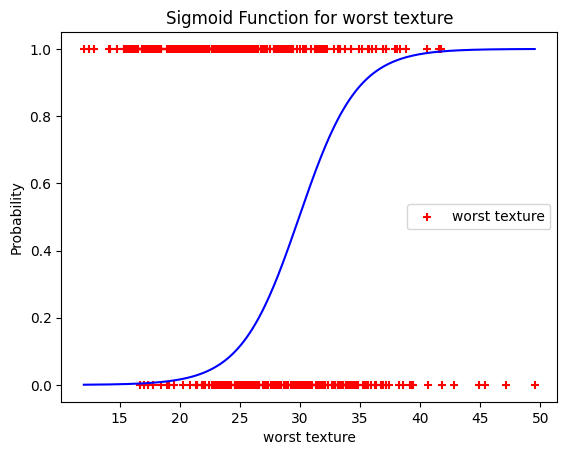

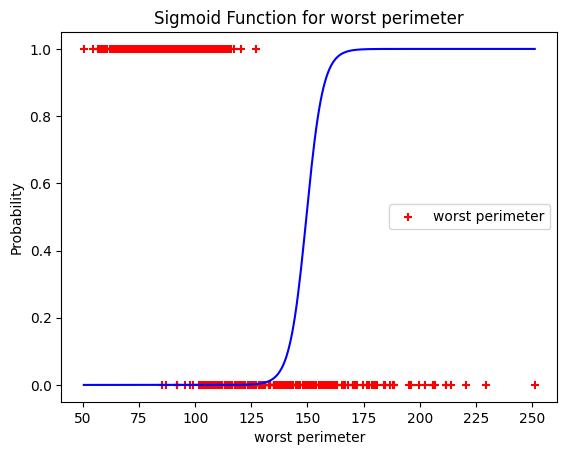

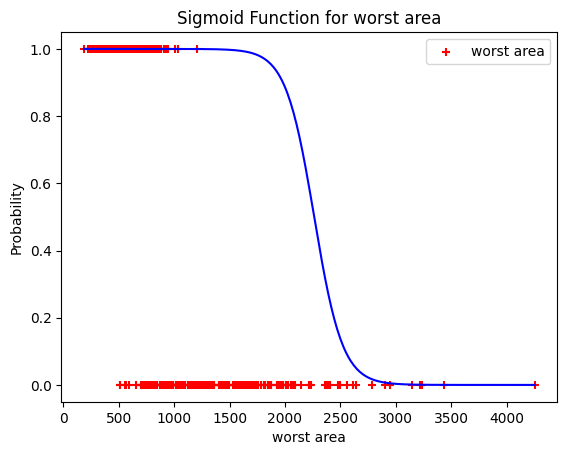

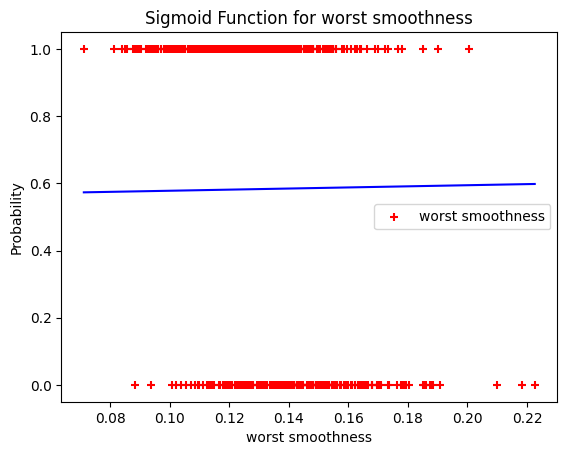

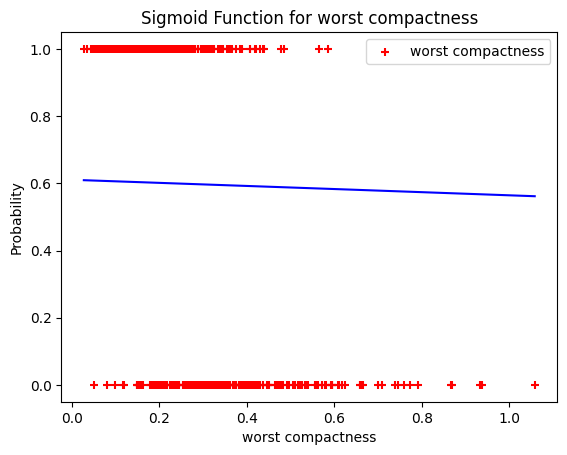

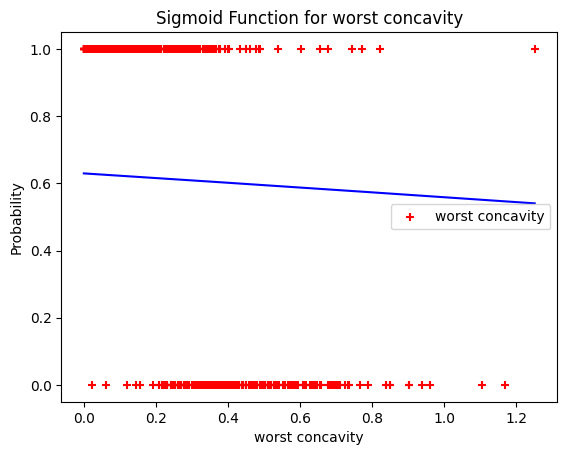

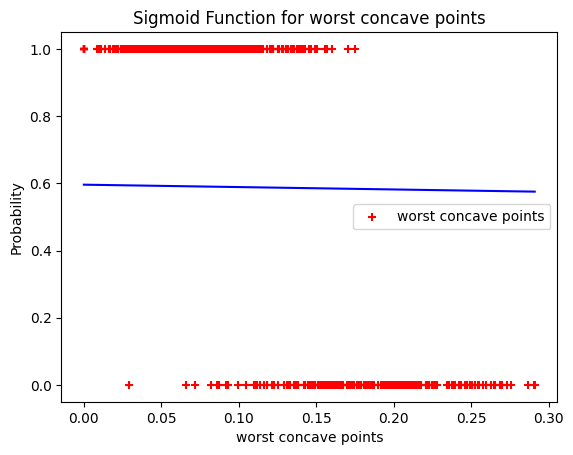

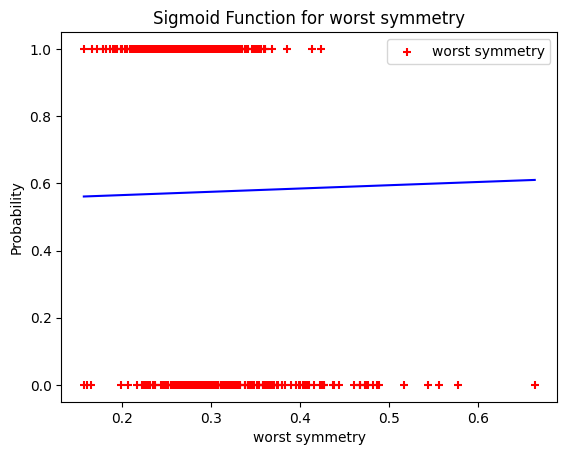

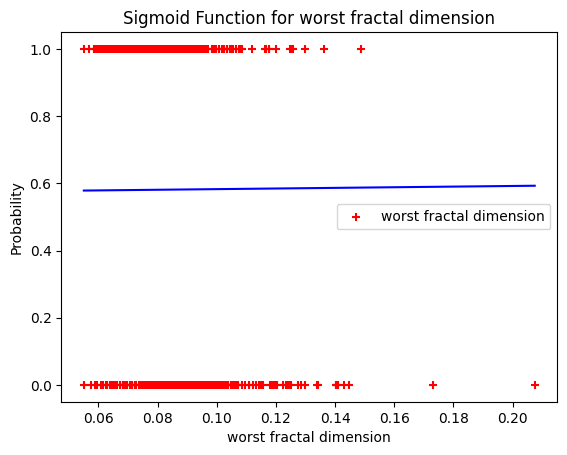

In [55]:

for i, col in enumerate(dataset.feature_names):
    # Createing a range of values for the feature
    feature_range = np.linspace(df[col].min(), df[col].max(), 300)
    # Normalizing the range values
    scaler_feature = StandardScaler()
    feature_range_scaled = scaler_feature.fit_transform(feature_range.reshape(-1, 1))[:, 0]
    
    # Calculating the sigmoid values
    z = feature_range_scaled * model.weights[i] + model.bias
    sigmoid_col = model.sigmoid(z)
    
    plt.scatter(df[col], y, label=f"{col}", marker="+", color="red")
    plt.plot(feature_range, sigmoid_col, color="blue")
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.title(f'Sigmoid Function for {col}')
    plt.legend()
    plt.show()
